In [1]:
import re, nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [16]:
with open("alice.txt") as myfile:
    data = " ".join(line.rstrip() for line in myfile)

print(data[:200])

Project Gutenberg's Alice's Adventures in Wonderland, by Lewis Carroll  This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever.  You may copy it, give it aw


In [2]:
# Deleting beginning and ending of a book (Gutenberg project info), deleting punctuation 
# and separating apostrophes from words

subbed = re.sub(r"(?:^).*?(?:Language\: English)", '', data)
subbed = re.sub(r"(?<=THE END).+", '', subbed)
subbed = re.sub(r"[^\w']+", " ", subbed).lower()
subbed = re.sub(r"'", " '", subbed)

#print(subbed[:250])

NameError: name 're' is not defined

In [18]:
# optional deleting stop words
stopWords = set(nltk.corpus.stopwords.words('english'))
text = subbed.split(" ")[1:]
#text = [w for w in text if w not in stopWords and len(w) > 1 and w[0] != "'"]
print(text[:250])

['start', 'of', 'this', 'project', 'gutenberg', 'ebook', 'alice', "'s", 'adventures', 'in', 'wonderland', 'produced', 'by', 'jana', 'srna', 'emmy', 'and', 'the', 'online', 'distributed', 'proofreading', 'team', 'at', 'http', 'www', 'pgdp', 'net', 'this', 'file', 'was', 'produced', 'from', 'images', 'generously', 'made', 'available', 'by', 'the', 'university', 'of', 'florida', 'digital', 'collections', 'alice', "'s", 'adventures', 'in', 'wonderland', 'illustration', 'alice', 'illustration', 'alice', "'s", 'adventures', 'in', 'wonderland', 'by', 'lewis', 'carroll', 'illustrated', 'by', 'arthur', 'rackham', 'with', 'a', 'proem', 'by', 'austin', 'dobson', 'london', 'william', 'heinemann', 'new', 'york', 'doubleday', 'page', 'co', 'printed', 'in', 'england', '_', "'tis", 'two', 'score', 'years', 'since', 'carroll', "'s", 'art', 'with', 'topsy', 'turvy', 'magic', 'sent', 'alice', 'wondering', 'through', 'a', 'part', 'half', 'comic', 'and', 'half', 'tragic', '_', '_enchanting', 'alice', 'blac

In [64]:
# Counting words frequency using counter based on dictionary

count = {}
for word in text:
    count.setdefault(word, 0)
    count[word] = count[word] + 1
    
# creating list from dictionary
    
freq_list = [(word, c) for word, c in zip(count.keys(), count.values())]
freq_list.sort(key = lambda x: x[1], reverse=True)
# print(freq_list)
print(freq_list[:10])

[('the', 1673), ('and', 898), ('to', 743), ('a', 648), ('it', 600), ('she', 552), ('of', 524), ('i', 513), ('said', 465), ('alice', 405)]


In [23]:
ranks = []
c_rank = 1
c_freq = freq_list[1][1]
for index, item in enumerate(freq_list):
    ranks.append(c_rank)
    c_rank += 1
#     if item[1] < freq_list[index-1][1]:
#         c_freq = item[1]
#         c_rank += 1
#         ranks.append(c_rank)
#     else:
#         ranks.append(c_rank)

print(ranks[:30])

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


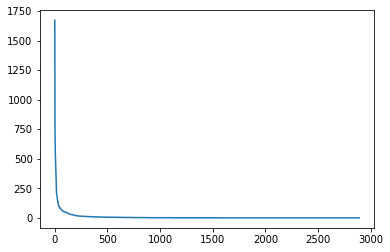

In [24]:
plt.plot(ranks,[i for w, i in freq_list])

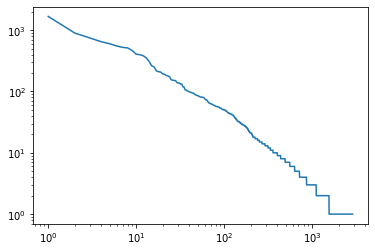

In [25]:
plt.loglog(ranks,[i for w, i in freq_list])

-1.198880653311428


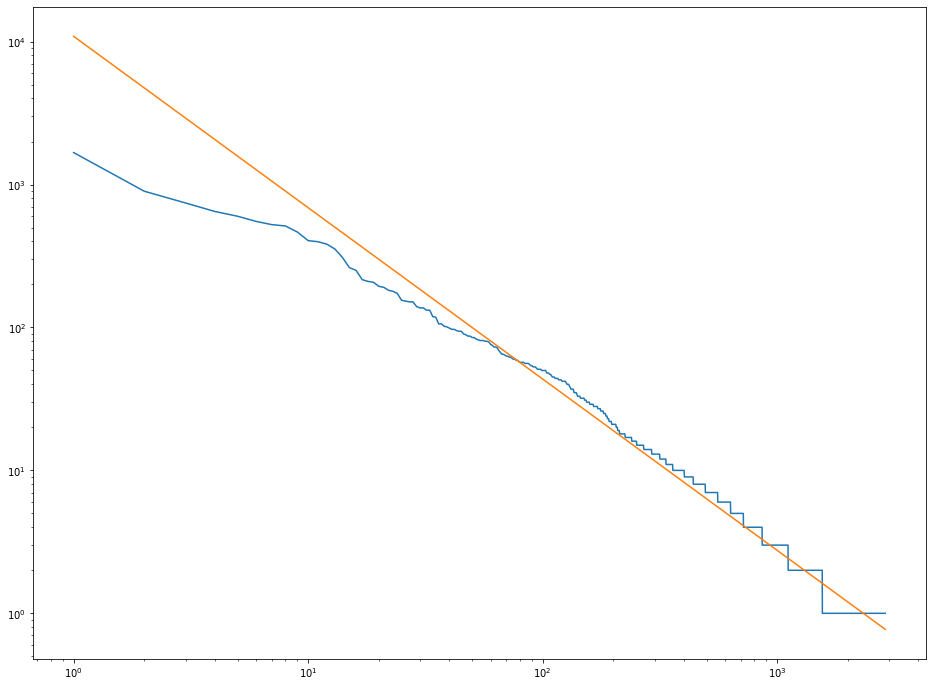

In [62]:
# fitting line in loglog scale and plotting it
from scipy import stats

x = np.array(ranks)
y = np.array([i for w, i in freq_list])
x_l = np.log10(x)
y_l = np.log10(y)

slope, intercept, r_value, p_value, std_err = stats.linregress(x_l,y_l)

plt.figure(figsize=(16,12))
plt.loglog(x,y)
plt.loglog(x, x**(slope)*10**intercept)
print(slope)

In [11]:
# Creating graph from 10 most common words and words adjacent to them. 
# Nodes = words, edges = words standing next to each other

G = nx.Graph()
nodes = [i[0] for i in freq_list[:10]]
vals = [i[1] for i in freq_list[:10]]
G.add_nodes_from(nodes, node_size=10,value=vals, label=nodes)

# If a word adjacent to one of ten most common is not a node, we add it and add an edge to the set

nds = set(nodes)
edges = set()
for i, word in enumerate(text[:len(text)-1]):
    if word in nds and text[i+1] in nds:
        edges.add((word, text[i+1]))
    elif word not in nds and text[i+1] in nds:
        G.add_node(word)
        edges.add((word, text[i+1]))
    elif word in nds and text[i+1] not in nds:
        G.add_node(text[i+1])
        edges.add((word, text[i+1]))
        
# Create edges from set
G.add_edges_from(edges)
pos=nx.spring_layout(G)

/home/bartosz/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


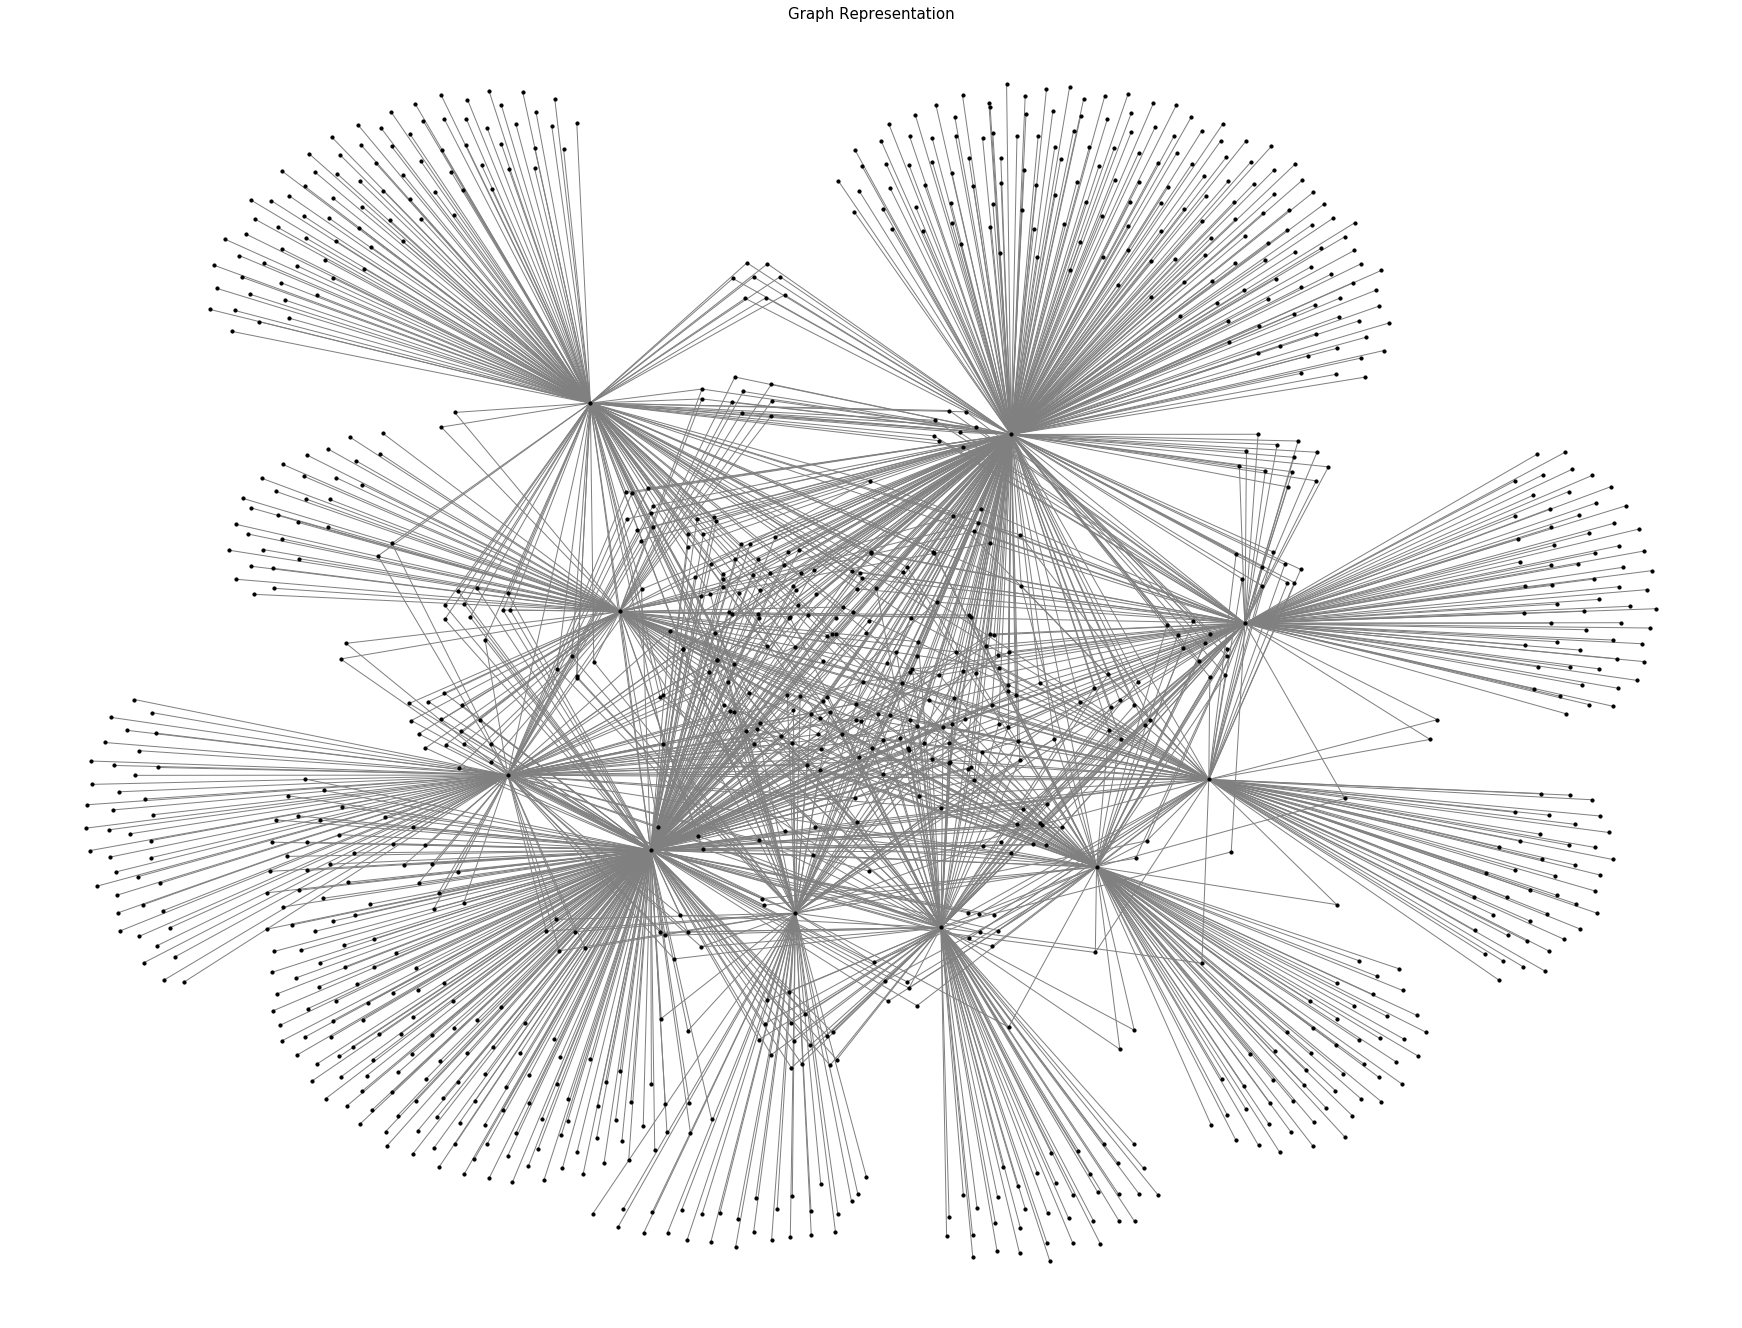

In [12]:
# simple plot showing structure of a data
plt.figure(figsize=(24, 18))
nx.draw(G, pos=pos, edge_color='grey',node_size=10, node_color='black')

plt.title('Graph Representation', size=15)
plt.show()

In [13]:
from pyvis import network as net

In [14]:
# Creating graph identical to previous

H = net.Network(height="750px", width="100%")

# for node in nodes:
#     H.add_node(node)
    
# for i, word in enumerate(text[:len(text)-1]):
#     H.add_edge(word, text[i+1])

H.from_nx(G)

In [15]:
# interactive graph will open in new tab
H.show_buttons(filter_=['physics'])
H.show('example.html')